In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file using pandas
df = pd.read_csv('/content/drive/My Drive/data/starting_data.csv')
df_test = pd.read_csv('/content/drive/My Drive/data/starting_data_test.csv')

# Now you can work with the DataFrame 'df'
print(df.head(2))

Mounted at /content/drive
                                                text  y
0  http://www.autocarnet.gr/2012/12/2_23.html *#*...  0
1  http://www.queen.gr/love-laugh-live/story/1275...  5


In [ ]:
df.text.iloc[0]

'http://www.autocarnet.gr/2012/12/2_23.html *#*Συμπληρώστε το ερωτηματολόγιο για την αξιοπιστία του αυτοκινήτου σας\nΕιδήσεις\nΠαραδόθηκε στην κυκλοφορία το τμήμα Παραδείσια Τσακώνα του αυτοκινητοδρόμου Κορίνθος Καλαμάτα\nΤέλος μπαίνει στην ταλαιπωρία των οδηγών μετακινούνταν από και προς την Καλαμάτα μέσω Παραδεισίων μετά την παράδοση στην κυκλοφορία του τμήματος της εθνικής οδού Τρίπολης Καλαμάτας στην περιοχή της Τσακώνας το οποίο παρέμεινε κλειστό εδώ και χρόνια λόγω έργων\nΘα υπάρχει μόνο μία μικρή\nπαράκαμψη στο σημείο κατασκευής της μεγάλης γέφυρας όπου βυθιζόταν ο δρόμος Ο χρόνος της διαδρομής Αθήνα Καλαμάτα χλμ θα μειωθεί περίπου κατά τριάντα λεπτά στις ώρες από ώρες και λεπτά που είναι σήμερα\nΜε την παράδοση του τμήματος Παραδείσια Τσακώνα αποδίδονται σε πλήρη κυκλοφορία και οι Ανισόπεδοι Κόμβοι Παραδεισίων και Κυπαρισσίας καθώς και το τμήμα από την Τσακώνα μέχρι τον Ανισόπεδο Κόμβο Κυπαρισσίας που κατασκευάστηκαν στο πλαίσιο της Σύμβασης Παραχώρησης του αυτοκινητοδρόμου Κόρ

SPLIT DATASET
* For each row we have multiple documents. We will keep each document as different row and keep the same y.

In [ ]:
exploded = df
# exploded['text'] = df['text'].str.split(r'\*#\*')
# # Explode the DataFrame
# exploded = exploded.explode('text')

# exploded_test = df_test
# exploded_test['text'] = df_test['text'].str.split(r'\*#\*')
# # Explode the DataFrame
# exploded_test = exploded_test.explode('text')

# print(exploded_test)

In [ ]:
# exploded_test.isna().sum()

In [ ]:
exploded.text = exploded.text.astype(str)
exploded.head()

# exploded_test.text = exploded_test.text.astype(str)
# exploded_test.head()

,text,y
0,http://www.autocarnet.gr/2012/12/2_23.html *#*...,0
1,http://www.queen.gr/love-laugh-live/story/1275...,5
2,http://www.aggeliorama.gr/exoplismos-epixeiris...,5
3,http://www.bikerspoint.gr/index.php?option=com...,0
4,http://www.athensgo.gr/%ce%bf%ce%b9-%ce%b3%cf%...,3


In [ ]:
def count_tokens(text):
    tokens = text.split()
    return len(tokens)

# Apply the function to each row
exploded['token_count'] = exploded['text'].apply(count_tokens)

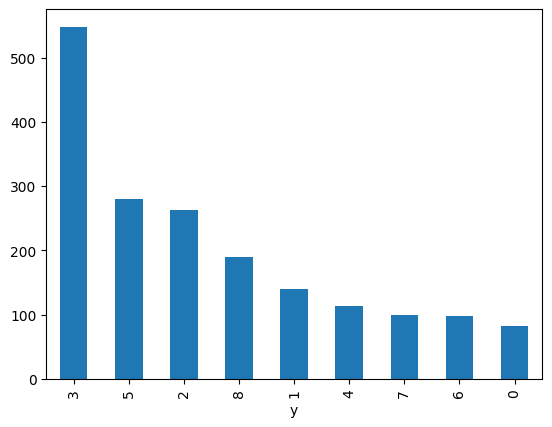

In [ ]:
exploded.y.value_counts().plot.bar();

<Axes: ylabel='Frequency'>

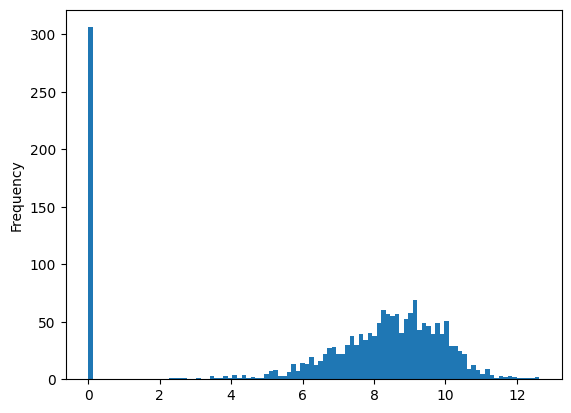

In [ ]:
exploded.token_count.median()
exploded.token_count.apply(np.log).plot.hist(bins=100)

PREPROCESS

In [ ]:
import unicodedata

def strip_accents_and_lowercase(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn').lower()

accented_string = "Εισαι χαζούλης βρε?"
unaccented_string = strip_accents_and_lowercase(accented_string)

print(unaccented_string) # αυτη ειναι η ελληνικη εκδοση του bert.

εισαι χαζουλης βρε?


In [ ]:
import re

def remove_numbers(text):
    # Use regular expression to remove all numbers
    return re.sub(r'\d+', '', text)

X_accent_strip = []
X_test_accent_strip = []

for sentence in exploded.text:
  sentence = remove_numbers(sentence)
  X_accent_strip.append(strip_accents_and_lowercase(sentence))

# for sentence in exploded_test.text:
#   sentence = remove_numbers(sentence)
#   X_test_accent_strip.append(strip_accents_and_lowercase(sentence))

exploded.text = X_accent_strip
# exploded_test.text = X_test_accent_strip

In [ ]:
exploded.iloc[0]

text    http://www.autocarnet.gr///_.html 
y                                        0
Name: 0, dtype: object

In [ ]:
train_clean = []
for sent in exploded.text:

  sent = sent.replace("\n", " ")

  sent = re.sub(r'http\S+', '', sent)

  sent = sent.replace("nan", " ")

  sent = re.sub(r'[a-zA-Z]', ' ', sent)

  train_clean.append(sent)

test_clean = []
for sent in exploded_test.text:

  sent = sent.replace("\n", " ")

  sent = re.sub(r'http\S+', '', sent)

  sent = sent.replace("nan", " ")

  sent = re.sub(r'[a-zA-Z]', ' ', sent)

  test_clean.append(sent)


In [ ]:
train_clean[0],train_clean[1]

(' ',
 'συμπληρωστε το ερωτηματολογιο για την αξιοπιστια του αυτοκινητου σας ειδησεις παραδοθηκε στην κυκλοφορια το τμημα παραδεισια τσακωνα του αυτοκινητοδρομου κορινθος καλαματα τελος μπαινει στην ταλαιπωρια των οδηγων μετακινουνταν απο και προς την καλαματα μεσω παραδεισιων μετα την παραδοση στην κυκλοφορια του τμηματος της εθνικης οδου τριπολης καλαματας στην περιοχη της τσακωνας το οποιο παρεμεινε κλειστο εδω και χρονια λογω εργων θα υπαρχει μονο μια μικρη παρακαμψη στο σημειο κατασκευης της μεγαλης γεφυρας οπου βυθιζοταν ο δρομος ο χρονος της διαδρομης αθηνα καλαματα χλμ θα μειωθει περιπου κατα τριαντα λεπτα στις ωρες απο ωρες και λεπτα που ειναι σημερα με την παραδοση του τμηματος παραδεισια τσακωνα αποδιδονται σε πληρη κυκλοφορια και οι ανισοπεδοι κομβοι παραδεισιων και κυπαρισσιας καθως και το τμημα απο την τσακωνα μεχρι τον ανισοπεδο κομβο κυπαρισσιας που κατασκευαστηκαν στο πλαισιο της συμβασης παραχωρησης του αυτοκινητοδρομου κορινθος τριπολη καλαματα και λευκτρο σπαρτη η κ

We need to remove rows with ' '

In [ ]:
exploded.text = train_clean
exploded.text = exploded.text.astype(str)

exploded_test.text = test_clean
exploded_test.text = exploded_test.text.astype(str)

# exploded = exploded[exploded['text'] != ' ']

# exploded.iloc[0]

# CHECKPOINT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
# exploded.to_csv('/content/drive/My Drive/Challenge/bert_checkpoint_1.csv', index=True)
# exploded_test.to_csv('/content/drive/My Drive/Challenge/bert_checkpoint_test_1.csv', index=True)

exploded = pd.read_csv('/content/drive/My Drive/Challenge/bert_checkpoint_1.csv')
exploded_test = pd.read_csv('/content/drive/My Drive/Challenge/bert_checkpoint_test_1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
final_train = exploded
final_train.text = final_train.text.astype(str)
final_train.y = final_train.y.astype(int)
final_train = final_train.rename(columns={'Unnamed: 0': 'real_index'})


final_test = exploded_test
final_test.text = final_test.text.astype(str)
final_test = final_test.rename(columns={'Unnamed: 0': 'real_index'})

In [ ]:
final_train.sample(10)

,real_index,text,y
35466,1209,γαμος δεξιωση παρτυ επιλογη τραγουδιων γαμος ...,2
42103,1437,σε παραγγελιες ανω των χωρις πιστωτικη πληρωσ...,5
44290,1499,περιπου στρεμματα θα αρδευσει ο νεος ταμιευτηρ...,3
41413,1414,τεχνολογια οκτω εφευρεσεις με δημιουργους γυνα...,3
5485,181,χιμαρα αλβανοι εισεβαλαν σε σπιτι και κατεβασα...,5
40359,1380,στα δικαστηρια ο καμαρινος στο υπεξ ο ντισιο...,3
15821,524,δημιουργηθηκε στις νοεμβριου επισκεψεις κα...,3
43955,1490,σαββατο αυγουστου κινδυνος εκδηλωσης διαβητη ...,3
16467,541,αρχειο εκδοσεων διακηρυξεις ντυπη εκδοση ισολο...,3
47381,1602,εγγυηση επισκευης μηνες οι παραπανω τιμες δε π...,5


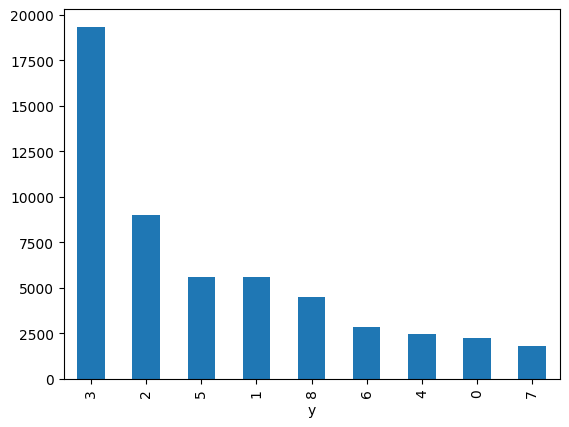

In [ ]:
final_train.y.value_counts().plot.bar();

In [ ]:
# # Function to split text into chunks of 300 words
# def split_text(text):
#     words = text.split()
#     return [' '.join(words[i:i+300]) for i in range(0, len(words), 300)]

# # Apply the function to split text into chunks
# final_train['text'] = final_train['text'].apply(split_text)

# # Explode the DataFrame based on the text_chunks column
# exploded_df = final_train.explode('text')

# # Drop the original text column if you don't need it anymore
# # exploded_df = exploded_df.drop(columns=['text'])

In [ ]:
# final_train = exploded_df
# exploded_df.y.value_counts().plot.bar();

In [ ]:
# final_train.head()
# final_train.text = final_train.text.astype(str)

In [ ]:
def count_tokens(text):
    tokens = text.split()
    return len(tokens)

# Apply the function to each row
final_train['token_count'] = final_train['text'].apply(count_tokens)


In [ ]:

final_train.token_count.mean() + final_train.token_count.std()

1628.4988441583612

In [ ]:
final_train.head()

,real_index,text,y,token_count
0,0,,0,0
1,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,353
2,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,174
3,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,145
4,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,265


In [ ]:
final_train = final_train[final_train.text.str.strip()!='']
final_train.head()

,real_index,text,y,token_count
1,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,353
2,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,174
3,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,145
4,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,265
5,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,508


In [ ]:
# from sklearn.utils import resample

# class_counts = final_train['y'].value_counts()

# # Find the minimum count
# min_count = class_counts.min()

# # Resample each class to match the minimum count for majority classes
# balanced_df = pd.DataFrame()
# for class_label, count in class_counts.items():
#     df_class = final_train[final_train['y'] == class_label]
#     if count > min_count:
#         # Undersample the majority classes
#         df_class_resampled = resample(df_class, replace=False, n_samples=min_count, random_state=42)
#     else:
#         # Keep the minority classes as they are
#         df_class_resampled = df_class
#     balanced_df = pd.concat([balanced_df, df_class_resampled])


In [ ]:
# balanced_df.y.value_counts().plot.bar();

In [ ]:
# final_train = balanced_df
# final_train.iloc[valid_indices].shape

In [ ]:

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'final_train' is your DataFrame
# Get unique real_index values
unique_real_index = final_train['real_index'].unique()

# Randomly split unique_real_index into train and validation with 80-20 ratio
np.random.seed(77)  # for reproducibility
train_indices, valid_indices = train_test_split(unique_real_index, test_size=0.2)

# Create a dictionary mapping each index to its split
real_index_to_split = {index: ('train' if index in train_indices else 'valid') for index in unique_real_index}

# Create a new column 'split' based on the mapping
final_train['split'] = final_train['real_index'].map(real_index_to_split)

# Split the DataFrame based on the 'split' column
df_train = final_train[final_train['split'] == 'train'].drop(columns=['split'])
df_valid = final_train[final_train['split'] == 'valid'].drop(columns=['split'])


In [ ]:
final_train.head()

,real_index,text,y,token_count,split
1,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,353,train
2,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,174,train
3,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,145,train
4,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,265,train
5,0,συμπληρωστε το ερωτηματολογιο για την αξιοπιστ...,0,508,train


In [ ]:
df_train.shape

(41290, 4)

In [ ]:
df_valid.shape

(10300, 4)

MODEL

In [ ]:
import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict

import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [ ]:
#Reproducing same results
SEED = 1311

#Torch
torch.manual_seed(SEED)

#Cuda algorithms
torch.backends.cudnn.deterministic = True

In [ ]:
df_train.sample(2)

,real_index,text,y,token_count
14332,468,τριτη απριλιου ντορα μπακογιαννη πελατειακες ...,6,60
21616,722,πως μια κολωνα μπορει να σωσει τη ζωη ενος πεζ...,2,23


In [ ]:
# Hyperparameters
MAX_LEN = 512
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16
EPOCHS = 10
LEARNING_RATE = 1e-05

In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")
model = AutoModel.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")

In [ ]:
# Function for the tokenization
def tokenize_text(data, tokenizer, max_length=MAX_LEN):
    return tokenizer(list(data), padding='max_length', max_length=max_length, truncation=True, return_tensors='pt')

bert_train = tokenize_text(df_train.text, tokenizer)
bert_val = tokenize_text(df_valid.text, tokenizer)
bert_test = tokenize_text(exploded_test.text, tokenizer)

bert_test['input_ids'].shape

torch.Size([17502, 512])

In [ ]:
# Convert categorical variable into dummy/indicator variables (one-hot encoding)
one_hot_ytrain = pd.get_dummies(df_train.y)
one_hot_ytrain = one_hot_ytrain.astype(int)
one_hot_ytrain = one_hot_ytrain.values
one_hot_ytrain = torch.tensor(one_hot_ytrain)

# Convert categorical variable into dummy/indicator variables (one-hot encoding)
one_hot_yval = pd.get_dummies(df_valid.y)
one_hot_yval = one_hot_yval.astype(int)
one_hot_yval = one_hot_yval.values
one_hot_yval = torch.tensor(one_hot_yval)


In [ ]:

class BertClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BertClassifier, self).__init__()
        self.bert = model
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)
        # Freeze all layers except the last four
        # for param in self.bert.parameters():
        #     param.requires_grad = False

        # # Unfreeze the last four layers
        # for param in self.bert.encoder.layer[-4:].parameters():
        #     param.requires_grad = True

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]
        #bacthnorm
        #linear schduler
        outputs = self.dropout(outputs)

        logits = self.classifier(outputs)
        return logits

model_1 = BertClassifier(num_classes=9)


In [ ]:
# Create loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model_1.parameters(), lr=LEARNING_RATE, weight_decay=0.01)

In [ ]:
model_1.to(device)

BertClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(35000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [ ]:
model_weights_path = '/content/drive/My Drive/Challenge/model_weights.pth'
model_1.load_state_dict(torch.load(model_weights_path))
# model_weights_path = '/content/drive/My Drive/Challenge/model_weights.pth'
# model_1.load_state_dict(torch.load(model_weights_path, map_location=torch.device('cpu')))


<All keys matched successfully>

In [ ]:
import gc
gc.collect()

51

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm


# Assuming you have your training data in tensors bert_train['input_ids'] and bert_train['attention_mask']
# and corresponding labels in a tensor called train_labels
train_inputs = bert_train['input_ids'].to(device)
train_masks = bert_train['attention_mask'].to(device)
train_labels = torch.tensor(df_train.y.values, dtype=torch.long).to(device)


# Assuming you have your validation data in tensors bert_val['input_ids'] and bert_val['attention_mask']
# and corresponding labels in a tensor called val_labels
val_inputs = bert_val['input_ids'].to(device)
val_masks = bert_val['attention_mask'].to(device)
val_labels = torch.tensor(df_valid.y.values, dtype=torch.long).to(device)

# Create Tensor datasets
train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
val_dataset = TensorDataset(val_inputs, val_masks, val_labels)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)

min_val_loss = np.inf
best_model_weights = model_1.state_dict().copy()

EPOCHS = 10
accumulation_steps = 2

# Training loop
for epoch in range(EPOCHS):
    model_1.train()
    total_loss = 0
    optimizer.zero_grad()
    for batch_idx, batch in enumerate(tqdm(train_loader)):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # optimizer.zero_grad()

        # Forward pass
        logits = model_1(input_ids, attention_mask)
        # probabilities = torch.softmax(logits, dim=1)
        # Calculate loss
        loss = criterion(logits, labels)
        total_loss += loss.item()

        # Backward pass
        loss.backward()
        if (batch_idx + 1) % accumulation_steps == 0:
            # Update weights after accumulation_steps batches
            optimizer.step()
            optimizer.zero_grad()  # Zero the gradients for the next accumulation

        # # Update weights
        # optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Train Loss: {avg_train_loss:.4f}")

    # Validation loop
    model_1.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.inference_mode():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            # Forward pass
            logits = model_1(input_ids, attention_mask)
            # probabilities = torch.softmax(logits, dim=1)

            # Calculate loss
            loss = criterion(logits, labels)

            # Get the predicted class
            _, predicted = torch.max(logits, 1)

            val_loss += loss.item()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct / total
    if avg_val_loss < min_val_loss:
        min_val_loss = avg_val_loss
        best_model_weights = model_1.state_dict()
        print("Validation loss improved. Saving the model.")


    print(f"Epoch {epoch+1}/{EPOCHS}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


100%|██████████| 2581/2581 [33:24<00:00,  1.29it/s]


Epoch 1/10, Train Loss: 0.9413
Validation loss improved. Saving the model.
Epoch 1/10, Validation Loss: 1.3694, Validation Accuracy: 0.5880


100%|██████████| 2581/2581 [33:24<00:00,  1.29it/s]


Epoch 2/10, Train Loss: 0.6090
Epoch 2/10, Validation Loss: 1.5104, Validation Accuracy: 0.5823


  0%|          | 9/2581 [00:07<34:49,  1.23it/s]


KeyboardInterrupt: 

SAVE BEST WEIGHTS

In [ ]:
# Load the best model weights
if best_model_weights is not None:
    model_1.load_state_dict(best_model_weights)

# import torch

# Assuming your model is named 'model'
# Save the model state dictionary to a file
torch.save(model_1.state_dict(), '/content/drive/My Drive/Challenge/model_weights.pth')


In [ ]:
import gc
gc.collect()

82

EVAL

In [ ]:
# Example text to classify
example_text = "ποδοσφαιρο ποδοσφαιρο ποδοσφαιρο μπασκετ βολευ"

# Tokenize the example text
encoded_example = tokenizer(example_text, padding='max_length', max_length=MAX_LEN, truncation=True, return_tensors='pt')

# Move input tensors to the same device as the model
input_ids = encoded_example['input_ids'].to(device)
attention_mask = encoded_example['attention_mask'].to(device)

# Set the model to evaluation mode
model_1.eval()

# Disable gradient calculation
with torch.inference_mode():
    # Forward pass
    logits = model_1(input_ids, attention_mask)
    # Apply softmax to get probabilities
    probabilities = torch.softmax(logits, dim=1)
    # Get the predicted class
    _, predicted_class = torch.max(probabilities, 1)
# print(logits)
print(probabilities)
# Convert predicted class index to actual label
# predicted_label = predicted_class.item()


tensor([[4.0499e-04, 9.8615e-01, 2.2973e-03, 8.9241e-03, 7.2213e-04, 6.0855e-04,
         8.4005e-05, 2.5333e-04, 5.5822e-04]], device='cuda:0')


In [ ]:
predicted_class

tensor([1], device='cuda:0')

In [ ]:


# avg_val_loss = 0
# val_accuracy = 0
# with torch.inference_mode():
#       for batch in val_loader:
#           input_ids, attention_mask, labels = batch
#           input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

#           # Forward pass
#           logits = model_1(input_ids, attention_mask)
#           probabilities = torch.softmax(logits, dim=1)

#           # Calculate loss
#           loss = criterion(probabilities, labels)

#           # Get the predicted class
#           _, predicted = torch.max(logits, 1)

#           val_loss += loss.item()

#           # Calculate accuracy
#           # _, predicted = torch.max(logits, 1)
#           total += labels.size(0)
#           correct += (predicted == labels).sum().item()

#       avg_val_loss = val_loss / len(val_loader)
#       val_accuracy = correct / total
#       if avg_val_loss < min_val_loss:
#           min_val_loss = avg_val_loss
#           best_model_weights = model_1.state_dict()
#           print("Validation loss improved. Saving the model.")

In [ ]:
bert_test['input_ids'].shape

torch.Size([17502, 512])

In [ ]:
# Group by 'real_index' and concatenate 'text'
grouped_df = final_test.groupby('real_index')['text'].apply(' '.join).reset_index()

print(grouped_df)
bert_test = tokenize_text(grouped_df.text, tokenizer)

     real_index                                               text
0             0    ειστε στο εκατ ευρω απο την εε για χρηματοδο...
1             1    ελληνικα      σχεδιαση ετικετας κρασιου  δημ...
2             2    τα ονειρα ο κοσμος του συναισθηματος μεσα μα...
3             3    στον πλατανια απεδειξαν πως τα ονειρα γινοντ...
4             4                                                   
..          ...                                                ...
600         600     για ολο το ωρο η ειναι μια εταιρια που δεν ...
601         601    τι στρωμα να διαλεξω  με βρισκουμε το καταλλ...
602         602    αγαπημενη αεροπορικη εταιρεια πλησιεστερο αε...
603         603    αγωνας του γυρου μεταξυ του ουκρανου και του...
604         604      κωστας γιαννακιδης δεκεμβριου  κωστας γιαν...

[605 rows x 2 columns]


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
# and corresponding labels in a tensor called val_labels
test_inputs = bert_test['input_ids'].to(device)
test_masks = bert_test['attention_mask'].to(device)

# Create Tensor datasets
test_dataset = TensorDataset(test_inputs, test_masks)
test_loader = DataLoader(test_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

# Set the model to evaluation mode
model_1.eval()

predicted_labels = []
probabilities_list = []

# Disable gradient calculation
with torch.no_grad():
    # Iterate through the test loader
    for batch in tqdm(test_loader):
        # Extract input_ids and attention_mask from the batch
        input_ids, attention_mask = batch
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)

        # Forward pass
        logits = model_1(input_ids, attention_mask)

        # Apply softmax to get probabilities
        probabilities = torch.softmax(logits, dim=1)

        # Get the predicted class
        _, predicted_classes = torch.max(probabilities, 1)

        # Convert predicted class indices to actual labels and append to the list
        predicted_labels.extend(predicted_classes.tolist())

        # Append probabilities to the list
        probabilities_list.append(probabilities)

# Concatenate probabilities from all batches
all_probabilities = torch.cat(probabilities_list, dim=0)

100%|██████████| 38/38 [00:11<00:00,  3.37it/s]


In [ ]:
probabilities = all_probabilities
all_probabilities.shape

torch.Size([605, 9])

In [ ]:
# # cross-entropy loss for multi-class classification
# def multiclass_cross_entropy(y_true, y_pred_prob):
#     epsilon = 1e-15  # small value to prevent log(0)
#     # clip predicted probabilities to avoid log(0)
#     y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
#     # compute cross-entropy loss
#     loss = -np.mean(np.sum(y_true * np.log(y_pred_prob), axis=1))
#     return loss

# # Convert categorical variable into dummy/indicator variables (one-hot encoding)
# one_hot_yval = pd.get_dummies(final_train.iloc[valid_indices].y)
# one_hot_yval = one_hot_yval.astype(int)
# # one_hot_yval = torch.tensor(np.array(one_hot_yval))
# # one_hot_yval = one_hot_yval.to(device)
# # Convert Pandas Series to NumPy array
# one_hot_yval = one_hot_yval.values

# print(one_hot_yval.shape)

(182, 9)


In [ ]:
# import torch

# # Assuming 'one_hot_yval' is a PyTorch tensor on CUDA device and 'probabilities' is also a tensor on CUDA device
# # Move tensors to CPU memory
# one_hot_yval_cpu = one_hot_yval
# probabilities_cpu = probabilities.cpu()

# # Now you can convert them to NumPy arrays
# one_hot_yval_numpy = one_hot_yval_cpu
# probabilities_numpy = probabilities_cpu.numpy()

# # Assuming 'multiclass_cross_entropy' function takes NumPy arrays as input
# log_loss = multiclass_cross_entropy(one_hot_yval_numpy, probabilities_numpy)

# print("Log-loss:", log_loss)


In [ ]:
# df_valid.real_index = df_valid.real_index.astype(int)

In [ ]:
# exploded_test.head()

,Unnamed: 0,text
0,0,
1,0,ειστε στο εκατ ευρω απο την εε για χρηματοδοτη...
2,0,ειστε στο τα διαθεσιμα σε χωρες ως δωρεαν αναβ...
3,0,ειστε στο συνεργασια με και πανοραμικο και στ ...
4,0,ειστε στο στη η εναντι δισ δολαριων στη η εναν...


In [ ]:
import pandas as pd
import torch

# Assuming you have loaded your dataframe as df and your tensor of probabilities as probs_tensor
probabilities = probabilities.cpu()
# Convert the tensor to a numpy array
probs_array = probabilities.numpy()

# Create a dataframe from the probabilities array
probs_df = pd.DataFrame(probs_array)
# Add the original index column to the probabilities dataframe
probs_df['original_index'] = exploded_test['Unnamed: 0']
# # Group by the original index and aggregate the probabilities
aggregated_probs = probs_df.groupby('original_index').mean()

# # Now aggregated_probs contains the aggregated probabilities for each document

In [ ]:
aggregated_probs

,0,1,2,3,4,5,6,7,8
original_index,,,,,,,,,
0,0.154398,0.248918,0.200212,0.234066,0.004852,0.048732,0.022202,0.023127,0.063495
1,0.001513,0.014547,0.147310,0.454636,0.002735,0.015274,0.014972,0.200380,0.148633
2,0.001724,0.114104,0.103071,0.594342,0.002053,0.057037,0.004872,0.038486,0.084312
3,0.003053,0.056335,0.259042,0.447157,0.037509,0.080912,0.002566,0.001575,0.111851
4,0.001627,0.001277,0.008973,0.775105,0.001603,0.175096,0.006860,0.004302,0.025158
...,...,...,...,...,...,...,...,...,...
600,0.013691,0.099992,0.297151,0.177037,0.005730,0.086664,0.022807,0.086205,0.210724
601,0.004777,0.059505,0.197023,0.395098,0.094275,0.113819,0.053454,0.010315,0.071735
602,0.026280,0.094276,0.090746,0.479850,0.018533,0.116525,0.067016,0.032372,0.074404


In [ ]:
# tensor_clipped = torch.clamp(np.array(aggregated_probs), min=0.025, max=0.975)
# tensor_clipped

TypeError: clamp() received an invalid combination of arguments - got (numpy.ndarray, max=float, min=float), but expected one of:
 * (Tensor input, Tensor min, Tensor max, *, Tensor out)
 * (Tensor input, Number min, Number max, *, Tensor out)


In [ ]:
tensor_clipped = torch.clamp(all_probabilities, min=0.025, max=0.975)
tensor_clipped

tensor([[0.0250, 0.0250, 0.0250,  ..., 0.0250, 0.0250, 0.0250],
        [0.0250, 0.0250, 0.1816,  ..., 0.0285, 0.0250, 0.0330],
        [0.0331, 0.1263, 0.1444,  ..., 0.0304, 0.1202, 0.0528],
        ...,
        [0.0250, 0.0250, 0.0250,  ..., 0.0250, 0.0250, 0.9356],
        [0.0250, 0.0250, 0.0250,  ..., 0.0250, 0.0250, 0.0250],
        [0.0250, 0.0250, 0.9730,  ..., 0.0250, 0.0250, 0.0250]],
       device='cuda:0')

In [ ]:
# Assuming aggregated_probs is your DataFrame with aggregated probabilities
# Define softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# Apply softmax row-wise
softmax_probs = aggregated_probs.apply(softmax, axis=1)

# softmax_probs now contains the probabilities after applying softmax
print(softmax_probs)


                           0             1             2         3  \
original_index                                                       
0               1.217198e-01  2.358897e-01  1.677414e-01  0.212597   
1               4.605332e-02  4.915451e-02  9.546740e-02  0.443817   
2               4.533364e-03  1.246447e-02  1.128625e-02  0.939203   
3               1.331861e-02  2.151393e-02  1.333617e-01  0.724944   
4               9.619590e-02  9.616229e-02  9.690516e-02  0.208485   
...                      ...           ...           ...       ...   
600             1.381106e-02  4.240950e-02  5.502895e-01  0.115464   
601             3.953398e-04  1.181210e-03  1.848385e-02  0.971075   
602             2.151575e-09  4.286296e-08  3.669671e-08  1.000000   
603             6.406415e-08  4.165950e-07  7.538960e-03  0.992320   
604             1.330166e-06  2.324392e-06  5.335148e-06  0.999977   

                           4             5             6             7  \
original_index 

In [ ]:
df_clipped = aggregated_probs.clip(lower=0.025, upper=0.975)
df_clipped

,0,1,2,3,4,5,6,7,8
original_index,,,,,,,,,
0,0.154398,0.248918,0.200212,0.234066,0.025000,0.048732,0.025000,0.025000,0.063495
1,0.025000,0.025000,0.147310,0.454636,0.025000,0.025000,0.025000,0.200380,0.148633
2,0.025000,0.114104,0.103071,0.594342,0.025000,0.057037,0.025000,0.038486,0.084312
3,0.025000,0.056335,0.259042,0.447157,0.037509,0.080912,0.025000,0.025000,0.111851
4,0.025000,0.025000,0.025000,0.775105,0.025000,0.175096,0.025000,0.025000,0.025158
...,...,...,...,...,...,...,...,...,...
600,0.025000,0.099992,0.297151,0.177037,0.025000,0.086664,0.025000,0.086205,0.210724
601,0.025000,0.059505,0.197023,0.395098,0.094275,0.113819,0.053454,0.025000,0.071735
602,0.026280,0.094276,0.090746,0.479850,0.025000,0.116525,0.067016,0.032372,0.074404


In [ ]:
# Convert PyTorch tensors to Pandas DataFrames
multiclass_cross_entropy(one_hot_yval, aggregated_probs)

0.8169023979356933

In [ ]:
test_domains = ['startupper.gr',
 'artware.gr',
 'oneirokritis.blogspot.gr',
 'kali-ellada.blogspot.gr',
 'ote.gr',
 'enimerosi24.gr',
 'fytro.com.gr',
 'amfiklia.gr',
 'toeidesauto.blogspot.gr',
 'a-special-edition.blogspot.gr',
 'sport-plus.gr',
 'tripadvisor.com.gr',
 'fanpage.gr',
 'foodoopro.gr',
 'xe.gr',
 'airtickets.gr',
 'networkdynamics.gr',
 'eap.gr',
 'anekdotakiastv.blogspot.gr',
 'prpanagiotopoulos.blogspot.gr',
 'cinemaclub.gr',
 'seisaxthia.blogspot.gr',
 'adecco.gr',
 'marketingweek.gr',
 'zougla.gr',
 'freegossip.gr',
 'ant1news.gr',
 'oneirokritis.gr',
 'onscreen.net.gr',
 'epirusgate.blogspot.gr',
 'mykonosdaily.gr',
 'pharmasofia.gr',
 'neoiorizontes.gr',
 'mylefkada.gr',
 'net360.gr',
 'ypakp.gr',
 'freddonews.gr',
 'figame.gr',
 'irafina.gr',
 'skroutz.gr',
 'tralala.gr',
 'newmoney.gr',
 'farmerama.gr',
 'korinthiakoi-orizontes.blogspot.gr',
 'safecase.gr',
 'otakustore.gr',
 'greekaffiliates.gr',
 'froyros.blogspot.gr',
 'invitromagazine.gr',
 'cretalive.gr',
 'patratora.gr',
 'kithiraikanea.blogspot.gr',
 'prismaradio.gr',
 'trikalaenimerosi.gr',
 'thessaliatv.gr',
 'medicalland.gr',
 '4troxoi.gr',
 'ballmaske.gr',
 'techit.gr',
 'paixnidia-stratigikis.gr',
 'powerforce.gr',
 'agrinioculture.gr',
 'ergonblog.gr',
 'golden-greece.gr',
 'youropia.gr',
 'esos.gr',
 'banksnews.gr',
 'karditsapress.gr',
 'neo.edu.gr',
 'fsa.gr',
 'ghz.gr',
 'fe-mail.gr',
 'the-walking-dead-greek-fanatics.blogspot.gr',
 'koyzoylo.gr',
 'keramidi-valtou.blogspot.gr',
 'greek-inews.gr',
 'infotime.gr',
 'lifehack.gr',
 'upatras.gr',
 'vouliwatch.gr',
 'kiosterakis.gr',
 'freemail.gr',
 'aetos-grevena.blogspot.gr',
 'a-sports.gr',
 'sofokleous10.gr',
 'diorismos.gr',
 'nickelodeon.gr',
 '10000paixnidia.gr',
 'metafysiko.gr',
 'katerinionline.gr',
 'uop.gr',
 'portes-asfaleias.gr',
 'oliviart-gr.blogspot.gr',
 'gr.gov.gr',
 'topnews24.gr',
 'pierikialithia.gr',
 'onpc.gr',
 'tameteora.gr',
 'efimerida-sporades.blogspot.gr',
 'arkadiapress.gr',
 'eviabest.gr',
 'scienceandtechnology.gr',
 'bestnews.gr',
 'audi.gr',
 'loveradio.gr',
 'parapolitika.gr',
 'avgi.gr',
 'nextlevelgroup.gr',
 '902.gr',
 'runnermagazine.gr',
 'lamiafm1.gr',
 'parianostypos.gr',
 'rocking.gr',
 'bet-dream.blogspot.gr',
 'emy.gr',
 'dimitriskazakis.blogspot.gr',
 'ivf-embryo.gr',
 'techblog.gr',
 'agrolaiki.gr',
 'on-news.gr',
 'careernet.gr',
 'greenmood.gr',
 'stoxos.gr',
 'web-greece.gr',
 'jobigator.gr',
 'saver.gr',
 'eduguide.gr',
 'gnto.gr',
 'thesout.gr',
 'aegaio.blogspot.gr',
 'akouseto.gr',
 'gonis.gr',
 'joytv.gr',
 'problogger.gr',
 'kalimera-arkadia.blogspot.gr',
 'hotel-chris.gr',
 'ktelxanthis.gr',
 'iatropedia.gr',
 'studiolefkatas.gr',
 'paidikoparty.gr',
 'lemonbook.gr',
 'athlodromos.blogspot.gr',
 'fomo.gr',
 'ti-einai.gr',
 'innews.gr',
 'santair.gr',
 'imerodromos.gr',
 'thessalonikiartsandculture.gr',
 'sete.gr',
 'ae-dikaioubc.gr',
 '310.gr',
 'ruberkon.gr',
 'nektarios.com.gr',
 'ipse.gr',
 'pillowfights.gr',
 'clickmedia.gr',
 'wraia.gr',
 'onsports.gr',
 'freemeteo.gr',
 'kalimera-arkadia.gr',
 'familypharmacy.gr',
 'e-kaisariani.gr',
 'ilaliatisroumelis.blogspot.gr',
 'artonweb.gr',
 'musicheaven.gr',
 'sportdrama.gr',
 'korinthostv.gr',
 'tosokaki.blogspot.gr',
 'proteon.gr',
 'kris-karras.gr',
 'ellak.gr',
 'myastro.gr',
 'adiexodos.blogspot.gr',
 'ski.gr',
 'thrakitoday.gr',
 'myphone.gr',
 'naousanews.gr',
 'vickytoxotis.blogspot.gr',
 'topnews.gr',
 'kosmoslarissa.gr',
 'jotis.gr',
 'dealnews.gr',
 'gr.gr',
 'noa.com.gr',
 'pitsirikos.blogspot.gr',
 'pestaola.gr',
 'paron.gr',
 'jokestream.blogspot.gr',
 'tuned.gr',
 'naxostimes.gr',
 'prevezanews.gr',
 'patrastimes.gr',
 'learningevolution.gr',
 'triklopodia.gr',
 'alouette.gr',
 'aegeanews.gr',
 'animalplanet.gr',
 'hua.gr',
 'prlogos.gr',
 'digitallife.gr',
 'ilioupoligiaolous.gr',
 'kolotoubes.blogspot.gr',
 'web-parrot.blogspot.gr',
 'grizosgatos.blogspot.gr',
 'nekthl.blogspot.gr',
 'downtimeforyou.blogspot.gr',
 'proklitiko.gr',
 'militaire.gr',
 'biscotto.gr',
 'sintagesgiaantres.gr',
 'vrisko.gr',
 'nakas.edu.gr',
 'autohire-chania.gr',
 'pancarshop.gr',
 'redumbrella.gr',
 'lolmoms.gr',
 'alexandreia-gidas.gr',
 'psichogios.gr',
 'spy727.gr',
 'fimotro.gr',
 'press-gr.blogspot.gr',
 'brainfood.gr',
 'staratalogia.blogspot.gr',
 'veriotis.gr',
 'sela.gr',
 'prohoster.gr',
 'oichalianews.gr',
 'bloggertips.gr',
 'thrakisports.blogspot.gr',
 'digital-artworks.gr',
 'parapona-rodou.gr',
 'protinews.gr',
 'evros24.gr',
 'wdesign.gr',
 'pharm24.gr',
 'pamebouzoukia.gr',
 'visit-pilio.gr',
 'lymberopoulos-lab.gr',
 'ikusi.gr',
 'greekpress.gr',
 'kerkyra.gr',
 'emprosnet.gr',
 'leoforos.gr',
 'tornosnews.gr',
 'kerdiseto.blogspot.gr',
 'trikalain.gr',
 'weplayball.gr',
 'asteiatoras.gr',
 'appleteam.gr',
 'design.com.gr',
 'visibility.gr',
 'tech4greece.gr',
 'eap.edu.gr',
 'batterypro.gr',
 'dancce.gr',
 'hotelamaryllis.gr',
 'polis-agora.blogspot.gr',
 'xespao.blogspot.gr',
 'anek.gr',
 'lixoudiesmarifanis.blogspot.gr',
 'fightsports.gr',
 'ebiskoto.gr',
 'perialos.blogspot.gr',
 'taxheaven.gr',
 'cinemode.gr',
 'trainose.gr',
 '007pcservice.gr',
 'fanaripress.gr',
 'e-diseis.gr',
 'away.gr',
 'travelstyle.gr',
 'andronikou.gr',
 'psarema.gr',
 'thessports.gr',
 'katohika.gr',
 'paoshop.gr',
 'athensvoice.gr',
 'angrybet.gr',
 'fmgreece.gr',
 'elawyer.blogspot.gr',
 'iskra.gr',
 'dietnet.gr',
 'tinosvoice.gr',
 'pharmnet.gr',
 'cookshop.gr',
 'top-sport.gr',
 'kavalanews.gr',
 'aray.gr',
 'gnto.gov.gr',
 'athenslab.gr',
 'dou.gr',
 'logotexnikesmikrografies.blogspot.gr',
 'kosinfo.gr',
 'zizel.gr',
 'epithimies.gr',
 'wedia.gr',
 'fightclubgalatsi.gr',
 'eeeek.gr',
 'vita4you.gr',
 'myorasis.gr',
 '2810.gr',
 'sportrikala.gr',
 'ipedia.gr',
 'daily-stories.gr',
 '24wro.com.gr',
 'left.gr',
 'xanthinea.gr',
 'sosiatroi.gr',
 'thessalianews.gr',
 'fitness-sport.gr',
 'mag24.gr',
 'goneisonline.gr',
 'politischios.gr',
 'travelpass.gr',
 'erevnhths.blogspot.gr',
 'ebooks4greeks.gr',
 'epiruspost.gr',
 'liberal.gr',
 'paokbc.gr',
 'rethymno.gr',
 'ifarsala.gr',
 'toperiodiko.gr',
 'fresh-education.blogspot.gr',
 'carnmotion.gr',
 'zodia123.gr',
 'trikalaola.blogspot.gr',
 '78-45.gr',
 'sahiel.gr',
 'freelancer.gr',
 'sailingboats.gr',
 'kathigitopolis.gr',
 'pointer.gr',
 'meteo.gr',
 'techfrog.gr',
 'aristonbts.gr',
 'mystudentpass.gr',
 'mythiki-anazitisi.blogspot.gr',
 'newsdiet.gr',
 'pharmacyonlineshop.gr',
 '4step.gr',
 'babyspace.gr',
 'report24.gr',
 'parakritika.gr',
 'ired.gr',
 'eudoxus.gr',
 'greekrowers.blogspot.gr',
 'unfollow.com.gr',
 'opinionpost.gr',
 'patakis.gr',
 'med-xrays.gr',
 'gamosdiorganosi.gr',
 'oneirokriths-oneira.gr',
 'newsorama.gr',
 'antikry.gr',
 'pocket-guide.gr',
 'taxydromos.gr',
 'inkefalonia.gr',
 'autoscoop.gr',
 'gourmed.gr',
 'freepen.gr',
 'sakisrouvas.gr',
 'parisk.gr',
 'aftofotos.blogspot.gr',
 'xronos.gr',
 'smsbox.gr',
 'ypodomes.blogspot.gr',
 'e-diet.gr',
 'goseminars.gr',
 'defenceline.gr',
 'hxostyle.gr',
 'infoserres.gr',
 'hadjidakis.gr',
 'soulouposeto.blogspot.gr',
 'arnos.gr',
 'pianoteacher.gr',
 'stinplatia.gr',
 'typologos.blogspot.gr',
 'infowoman.gr',
 'edromos.gr',
 'elderbet.blogspot.gr',
 'koinos--nous.blogspot.gr',
 'fannatics.gr',
 'manslife.gr',
 'atromitistas.gr',
 'ischool.gr',
 'e-pontos.gr',
 'naxios.blogspot.gr',
 'stoxasmos-politikh.blogspot.gr',
 'viotiashop.blogspot.gr',
 'serresparatiritis.gr',
 'top-nea.blogspot.gr',
 'techne.gr',
 '24oresimathia.gr',
 'totalskin.gr',
 'ermionigreece.blogspot.gr',
 'vivanews.gr',
 'clopyandpaste.blogspot.gr',
 'anagnostirio.gr',
 'greatfood.gr',
 'ofis66.blogspot.gr',
 'delikaris-sport.gr',
 'ygeianet.gr',
 'piperies.gr',
 'kotsadoros.gr',
 'mixanitouxronou.gr',
 'vitaraclub.gr',
 'homecorner.gr',
 'dikaiologitika.blogspot.gr',
 'kouzoulo.blogspot.gr',
 'freerider.gr',
 'semifind.gr',
 'elastika-mitoglou.gr',
 'hotelscombined.gr',
 'automarin.gr',
 'parakato.gr',
 'diastixo.gr',
 'teiep.gr',
 'kathimerini.gr',
 'segas.gr',
 'uom.gr',
 'doctv.gr',
 'xespao.gr',
 'bluestarferries.gr',
 'xronometro.blogspot.gr',
 'svouranews.blogspot.gr',
 'ert.gr',
 'nafpaktianews.gr',
 'secnews.gr',
 'imagine897.gr',
 'alfavita.gr',
 'exipno.gr',
 'asfalistroulis.blogspot.gr',
 'my-shop.gr',
 'edu4adults.blogspot.gr',
 'usay.gr',
 'paidikaicinema.blogspot.gr',
 'pamekonstantinoupoli.gr',
 'basketforum.gr',
 'aquaexterior.gr',
 'healthreport.gr',
 'iviskospublications.gr',
 'ilovemyseries.blogspot.gr',
 'stinplatia.blogspot.gr',
 'patrasnews.gr',
 'e-karystos.gr',
 'e-peristeri.gr',
 'epirusblog.gr',
 'viva.gr',
 'infokids.gr',
 'paintmycar.gr',
 'mantinades.gr',
 'skaikairos.gr',
 'kalogritsasinsurance.gr',
 'poki.gr',
 'lamianow.gr',
 'funday.gr',
 'qenglish.gr',
 'xorisorianews.gr',
 'papaki.gr',
 'sinidisi.gr',
 'crashonline.gr',
 'tromaktiko.gr',
 'hostdog.gr',
 'sch.gr',
 'ellada-russia.gr',
 'kefalonianews.gr',
 'dietup.gr',
 'sentragoal.gr',
 'melodia.gr',
 'naxos.gr',
 'translatum.gr',
 'antifono.gr',
 'prasinoforos.gr',
 'star.gr',
 'ad24.gr',
 'epikaira.gr',
 'samostimes.gr',
 'athensdeejay.gr',
 'apodoxi.gr',
 'youpharmacy.gr',
 'saltandsugar.gr',
 'anexartitos.gr',
 'thesstoday.gr',
 'e-crochet.blogspot.gr',
 'service-iphone.gr',
 'argolikeseidhseis.gr',
 'fullhd.gr',
 'joinradio.gr',
 'livanis.gr',
 'proderm.gr',
 'beautycorner.gr',
 'money-tourism.gr',
 'filonoi.gr',
 'deasy.gr',
 'el.gr',
 'designed.gr',
 'eosagriniou.gr',
 'diadoseto.gr',
 'e-didaskalia.blogspot.gr',
 'panteion.gr',
 'aluminium.gr',
 'kranosgr.blogspot.gr',
 'elora.gr',
 'eimaimama.blogspot.gr',
 'pharmacy4u.gr',
 'achaianews.gr',
 'maradclub.blogspot.gr',
 'eviazoom.blogspot.gr',
 'psmedical.gr',
 'stoplekto.gr',
 'multi-news.gr',
 'epspierias.gr',
 'rebike-art.gr',
 'modernmoms.gr',
 'goof.gr',
 'kollintzas.gr',
 'cycladesvoice.gr',
 'morethanawoman.gr',
 'ekivolos.gr',
 'hysteria.gr',
 'govastileto.gr',
 'mastrantonis-istiofora.gr',
 '123tv.gr',
 'globaledu.gr',
 'dermadvance.gr',
 'proinoslogosnews.gr',
 'greekaffair.gr',
 'kavala-portal.gr',
 'exomatiakaivlepo.blogspot.gr',
 'tsotilion.blogspot.gr',
 'sibilla-gr-sibilla.blogspot.gr',
 'culture.gr',
 'imode.gr',
 'megatv.gr',
 'ioannidismanolis.blogspot.gr',
 'energ.gr',
 'odigosxanthis.gr',
 'efenpress.gr',
 'hyperhosting.gr',
 'dytikanea.gr',
 'avatonpress.gr',
 'ebooks4greeks.blogspot.gr',
 'geogeo.gr',
 'rentacarlesvos.gr',
 'zoornalistas.blogspot.gr',
 'lavriaki.gr',
 'busted.gr',
 'cip.gr',
 'fimotro.blogspot.gr',
 'netplanet.gr',
 'tvxs.gr',
 'autopower.gr',
 'proslipsis.gr',
 'tospitakimou.gr',
 'newsblog.gr',
 'zappit.gr',
 'allyou.gr',
 'autotriti.gr',
 'filmboy.gr',
 'cineramen.blogspot.gr',
 'monopoli.gr',
 'autocity.gr',
 'carwall.gr',
 'texnitesonline.gr',
 'creationweb.gr',
 'smashsport.gr',
 'cretetv.gr',
 'oasth.gr',
 'techsmart.gr',
 'ballistic.gr',
 'maresei.gr',
 'lesvosnews.gr',
 'koutipandoras.gr',
 'benaki.gr',
 'megalopoli.blogspot.gr',
 'tax-analysis.blogspot.gr',
 'lenshop.gr',
 'villaoasis.gr',
 'padma.gr',
 'we24.gr',
 'hydra.gr',
 'museum-hotel.gr',
 'oneclickpharmacy.gr',
 'travelchat.gr',
 'secretmust.gr',
 'orthomedicare.gr',
 'enews24.gr',
 'deltanews.gr',
 'e-iatroi.gr',
 'proininews.gr',
 'myportal.gr',
 'radiokalloni.gr',
 'neraidokiklos.gr',
 'gorgoneskaimages.gr',
 'proinanea.gr',
 'anytime.gr',
 'taexeiola.gr',
 'milostravel.gr',
 'michanikos.gr',
 'ellinikahoaxes.blogspot.gr',
 'rise.gr',
 'relaxstrom.gr',
 'airliners.gr',
 'palema.gr',
 'protagon.gr']

In [ ]:
import csv

# Write predictions to a file
with open('/content/drive/My Drive/Challenge/predictions_bert_clipped_agr.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    lst = list()
    for i in range(9):
        lst.append('class_'+str(i))
    lst.insert(0, "domain_name")
    writer.writerow(lst)
    for i,test_host in enumerate(test_domains):
        lst = df_clipped.iloc[i].tolist()
        lst.insert(0, test_host)
        writer.writerow(lst)

In [ ]:
test_preds

NameError: name 'test_preds' is not defined

BERT

* Simple bert. Validation Loss: 1.3768, Validation Accuracy: 0.5669


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Challenge/graph_baseline.csv')


In [ ]:
df.head()

,domain_name,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8
0,startupper.gr,0.045292,0.082967,0.141078,0.287177,0.069283,0.150185,0.072099,0.062008,0.089910
1,artware.gr,0.095452,0.112287,0.128249,0.218759,0.052454,0.118092,0.088602,0.082934,0.103172
2,oneirokritis.blogspot.gr,0.019474,0.024396,0.164017,0.306832,0.080069,0.166835,0.023723,0.063522,0.151131
3,kali-ellada.blogspot.gr,0.028954,0.044214,0.154680,0.304422,0.076981,0.171349,0.047905,0.061779,0.109715
4,ote.gr,0.001010,0.007687,0.136738,0.484615,0.115535,0.112794,0.001266,0.016610,0.123744


In [ ]:
# Filter rows where the text column contains only spaces
rows_with_only_space = exploded_test[exploded_test.text.str.strip() == '']

# Get the indices of rows with only spaces
indices_with_only_space = rows_with_only_space.index
indices_with_only_space
# # Get the number of classes
# num_classes = predicted_proba_clf.shape[1]

# # Create a uniform probability distribution across all classes
# uniform_probability = np.full((1, num_classes), 1/num_classes)

# # Replace the rows with only spaces in predicted_proba_clf with uniform probability
# predicted_proba_clf[indices_with_only_space, :] = uniform_probability

# print(predicted_proba_clf)


Index([    0,     7,    12,    21,    30,    31,    79,    90,   107,   136,
       ...
       17295, 17310, 17316, 17317, 17348, 17349, 17362, 17382, 17426, 17473],
      dtype='int64', length=605)

In [ ]:
exploded_test.head()

,Unnamed: 0,text
0,0,
1,0,ειστε στο εκατ ευρω απο την εε για χρηματοδοτη...
2,0,ειστε στο τα διαθεσιμα σε χωρες ως δωρεαν αναβ...
3,0,ειστε στο συνεργασια με και πανοραμικο και στ ...
4,0,ειστε στο στη η εναντι δισ δολαριων στη η εναν...
